In [270]:
import pandas as pd

# Revisión del DATASET

In [271]:
# leer dataframe
df_netflix = pd.read_csv('netflix_titles.csv')

In [272]:
# tipo de dato
df_netflix.dtypes

# podemos observar como algunas columnas tienen un tipo de dato incorrecto,
    # por ejemplo la duracion (debería ser tipo int64, rating (int64), date(int64 )

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [273]:
# forma del dataframe
df_netflix.shape

(8807, 12)

# Identification of missing data 

## isnull()

In [274]:
# numero de filas que faltan en cada columna. False no es nulo, True es nulo
df_netflix.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [275]:
# Suma de missing data por columnas
df_netflix.isnull().sum().sort_values(ascending=False)

# vemos que en la columna Director hay mucho missing data.
    # en casos de que falten muchos datos se suele recomendar eliminar esa columna.

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

In [276]:
# % de filas faltantes en cada columna
for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()
    print(column +':'+ str(round(percentage*100, 2)))

show_id:0.0
type:0.0
title:0.0
director:29.91
cast:9.37
country:9.44
date_added:0.11
release_year:0.0
rating:0.05
duration:0.03
listed_in:0.0
description:0.0


# Managing missing Data
.drop, .dropna, .isnull

In [277]:
# eliminar columna o fila con drop., .dropna or isnull

## .drop  | Delete Columns

In [278]:
df_netflix.drop('director', axis=1)
    # este drop crea una copia del dataframe elimnando la columna director

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## .isnull + .drop | Delete rows

In [279]:
# eliminar filas nulas
    # en primer lugar filtramos por los index que son nulos en columna director
no_director = df_netflix[df_netflix['director'].isnull()].index  

In [280]:
df_netflix[df_netflix['director'].isnull()].index  

Int64Index([   1,    3,    4,   10,   14,   15,   17,   19,   21,   25,
            ...
            8775, 8780, 8783, 8784, 8785, 8795, 8796, 8797, 8800, 8803],
           dtype='int64', length=2634)

In [281]:
 # en segundo lugar, asignamos al filtro un nombre y eliminamos los indexes nulos filtrado
df_netflix.drop(no_director, axis=0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## ~ + .isnull | Delete rows

In [282]:

# al utilizar el simbolo ~ estamos indicando que selecciones lo opuesto a lo que indica la función.
df_netflix[~(df_netflix['director'].isnull())]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## .dropna | Delete rows

In [283]:
# con la siguiente sintaxis seleccionamos solo dos datos No nulos en la columna director
df_netflix.dropna(subset=['director']).head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."


### Checking out results

In [284]:
# para comprobar que el resultado el correcto:
# vemos que la columna de directo ya no tiene valores nulos
df_netflix.dropna(subset=['director']).isnull().sum()

show_id           0
type              0
title             0
director          0
cast            473
country         422
date_added        0
release_year      0
rating            1
duration          3
listed_in         0
description       0
dtype: int64

In [285]:
# si se quisiera guardar el resultado en el dataframe original
    # podría utilizarse ,inplace=True

## .fillna Reemplazar NA por la media, mediana (datos numericos) y moda(categoricos)

In [286]:
# utlizaremos por facilidad, una columna que tenga menor porcentaje de datos nulos
    # comparado con la columna director usada anterioremente
# usaremos la columna rating y calculamos la moda.
    # la moda es el valor mas repetido en esta columna. Lo usaremos para reemplazar nulos
df_netflix['rating'].mode()

0    TV-MA
Name: rating, dtype: object

In [287]:
# el valor de moda obtenido son caracteres de texto, por lo que debemos definirlos como tal
    # para ello usamos .join que va a unir todo el resultado obtenido sin añadir nada, indicado con ''
mode = ''.join(df_netflix['rating'].mode())



In [288]:
# comprobamos cuales son los valores nulos en la columna rating
df_netflix[df_netflix['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [289]:
# a continuación sustituimos los valores nulos por el valor de la moda con fillna
df_netflix['rating'].fillna(mode, inplace=True)
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [290]:
df_netflix.loc[5989]

show_id                                                     s5990
type                                                        Movie
title           13TH: A Conversation with Oprah Winfrey & Ava ...
director                                                      NaN
cast                                  Oprah Winfrey, Ava DuVernay
country                                                       NaN
date_added                                       January 26, 2017
release_year                                                 2017
rating                                                      TV-MA
duration                                                   37 min
listed_in                                                  Movies
description     Oprah Winfrey sits down with director Ava DuVe...
Name: 5989, dtype: object

### reemplazar por numero arbitrario con .fillna()

In [291]:
# en este caso escogemos la columna duration que tiene 3 valores nulos y vamos a sustituirlos
df_netflix['duration']

# observamos que hay datos en unidad de tiempo y otros en Season-
    # sería recomendable sustituir todo en valores numericos o de tiempo
# para sustituir los valores nulos, podemos utilizar el 0, ya que este no alterará el resultado 

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [18]:
# sustituyendo nulos por 0
df_netflix['duration'].fillna(0, inplace=True)
df_netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [19]:
# comprobando correcta sustitución de nulos
df_netflix[df_netflix['rating'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


### BACKWARD / FORWARD
otro modo de reemplazar valores nulos en función de los datos no nulos de la fila anterior o siguiente

In [20]:
# backward, de la fila inferior a la superior. copia de fila de mayor index a fila de menor index
df_netflix.fillna(method='bfill')


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Julien Leclercq,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",India,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Mike Flanagan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Mike Flanagan,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [21]:
# forward, copia de fila posterior a la anterior, copia de la fila de menor index a la de mayor index
df_netflix.fillna(method='ffill')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


# Extracting Data .split() .extract() | Changing datatype astype()

## split()

In [22]:
# extraer datos de la columna "duration" con split() y extract() 

df_netflix['duration']

0          90 min
1       2 Seasons
2        1 Season
3        1 Season
4       2 Seasons
          ...    
8802      158 min
8803    2 Seasons
8804       88 min
8805       88 min
8806      111 min
Name: duration, Length: 8807, dtype: object

In [266]:
# vamos a seleccionar las filas correspondientes a movies
# para así obtener solo valores en minutos y no de Seasons

df_movie = df_netflix[df_netflix['type']=='Movie']
df_movie['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [267]:
# ahora debemos aislar solo los datos numericos, pues el resto no podemos usarlo para análisis
# extraemos solo los numeros
# Split, tiene por defecto el separador es espacio en blanco, pero podemos determinar el separador.
    # en este caso vamos a separar el texto y debemos indicarlo con .str.split
df_movie['duration'].str.split()

0        [90, min]
6        [91, min]
7       [125, min]
9       [104, min]
12      [127, min]
           ...    
8801     [96, min]
8802    [158, min]
8804     [88, min]
8805     [88, min]
8806    [111, min]
Name: duration, Length: 6131, dtype: object

In [268]:
# a continuación veremos un método para separar columnas en función del separador definido con split
# el atributo es expand=True
df_movie['duration'].str.split(expand=True)

,0,1
0,90,min
6,91,min
7,125,min
9,104,min
12,127,min
...,...,...
8801,96,min
8802,158,min
8804,88,min
8805,88,min


In [269]:
# para seleccionar solo una de las columnas añadimos [numero de columna]
df_movie['duration'].str.split(expand=True)[0]

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: 0, Length: 6131, dtype: object

In [71]:
# observamos que el resultado del dataframe el tipo de valores es object
    # debemos cambiarlo a tipo numero. usando astype
    # y devuelve el siguiente error, el cual solucionaremos a continuación

df_movie['duration'].str.split(expand=True)[0].astype(int)

ValueError: cannot convert float NaN to integer

In [ ]:
# el error proviene de df_netflix['duration'].fillna(0, inplace=True)
    # con el cual se sustituyeron los valores nulos por cero
    # que al ejecutar df_movie['duration'].str.split(expand=True)[0].astype(int),
        # estamos cambiando el tipo de str a int, pero los 0 (que sustituyeron los nulos), 
            # no son reconocidos como str por el 0 es int. Y esta situación crea conflicto.

In [292]:
# solucionamos modificando la sustitucion de nulos por 0 pero en tipo str. Añadiendo ''
df_netflix['duration'].fillna('0', inplace=True)
df_movie = df_netflix[df_netflix['type']=='Movie']
df_movie['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8801     96 min
8802    158 min
8804     88 min
8805     88 min
8806    111 min
Name: duration, Length: 6131, dtype: object

In [293]:
df_movie['duration'].str.split(expand=True)[0].astype(int)

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: 0, Length: 6131, dtype: int32

In [294]:
df_movie = df_movie.assign(minute=df_movie['duration'].str.split(expand=True)[0].astype(int), inplace=True)


In [295]:
# comprobamos el tipo de dato
df_movie.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
minute           int32
inplace           bool
dtype: object

In [296]:
# usamos otro parametro llamado pat
# para ello usaremos la colummna date_added que contiene texto numero y comas.

df_netflix['date_added'].str.split(pat=',', expand=True)

,0,1
0,September 25,2021
1,September 24,2021
2,September 24,2021
3,September 24,2021
4,September 24,2021
...,...,...
8802,November 20,2019
8803,July 1,2019
8804,November 1,2019
8805,January 11,2020


In [297]:
# el atributo pat es muy util usado con expresiones regulares
# permitiendo extraer el año solo como cuatro digitos.
df_netflix['date_added'].str.split(pat='\d{4}', expand=True)
# la separación se hizo cada 4 digitos

,0,1
0,"September 25,",
1,"September 24,",
2,"September 24,",
3,"September 24,",
4,"September 24,",
...,...,...
8802,"November 20,",
8803,"July 1,",
8804,"November 1,",
8805,"January 11,",


## extract()

In [298]:
df_netflix['date_added'].str.extract('(\d{4})')


,0
0,2021
1,2021
2,2021
3,2021
4,2021
...,...
8802,2019
8803,2019
8804,2019
8805,2020


# Identify outliers

## Histogram numeric data

In [188]:
# hacer histograma con pandas
print(df_movie['minute'])
print(df_movie['minute'].mean())

0        90
6        91
7       125
9       104
12      127
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: minute, Length: 6131, dtype: int32
99.52846191485891


<AxesSubplot:ylabel='Frequency'>

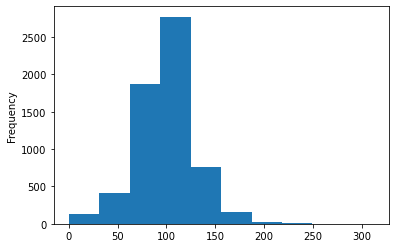

In [189]:
# representamos las frecuencias en histograma para visualizar outliers
df_movie['minute'].plot(kind='hist', bins=10)

In [190]:
# obtener rangos de las barras con el metodo value_counts
    # y el numero de elementos dentro de las barras
    
df_movie['minute'].value_counts(bins=10).sort_index()

(-0.313, 31.2]     135
(31.2, 62.4]       410
(62.4, 93.6]      1867
(93.6, 124.8]     2772
(124.8, 156.0]     766
(156.0, 187.2]     150
(187.2, 218.4]      22
(218.4, 249.6]       6
(249.6, 280.8]       2
(280.8, 312.0]       1
Name: minute, dtype: int64

In [134]:
# tratamiento de outliers
df_movie[(df_movie['minute']>31.2) & (df_movie['minute']<218)]

,show_id,minute,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,90,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
6,s7,91,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,125,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
9,s10,104,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
12,s13,127,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,96,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...
8802,s8803,158,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,88,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,88,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [191]:
# para encontrar los outliers que no cumplen la condicion indicada,
 # introducimos el simbolo ~
df_movie[~((df_movie['minute']>31.2) & (df_movie['minute']<218))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute,inplace
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23,True
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13,True
166,s167,Movie,Once Upon a Time in America,Sergio Leone,"Robert De Niro, James Woods, Elizabeth McGover...","Italy, United States","September 1, 2021",1984,R,229 min,"Classic Movies, Dramas",Director Sergio Leone's sprawling crime epic f...,229,True
694,s695,Movie,Aziza,Soudade Kaadan,"Caress Bashar, Abdel Moneim Amayri","Lebanon, Syria","June 17, 2021",2019,TV-PG,13 min,"Comedies, Dramas, Independent Movies",This short film follows a newly displaced Syri...,13,True
695,s696,Movie,Besieged Bread,Soudade Kaadan,"Lama Hakeim, Gabriel Malki, Ehab Shaaban",NaN,"June 17, 2021",2015,TV-14,12 min,"Dramas, International Movies","In battle-ridden Syria, a woman trying to smug...",12,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7788,s7789,Movie,Power Rangers: Megaforce: The Robo Knight Befo...,James Barr,"Andrew M. Gray, Ciara Hanna, John Mark Louderm...",United States,"January 1, 2016",2013,TV-Y7,24 min,Children & Family Movies,Robo Knight learns the meaning of Christmas fr...,24,True
7848,s7849,Movie,Refugee,"Clementine Malpas, Leslie Knott","Cate Blanchett, Lynsey Addario, Omar Victor Di...",NaN,"March 10, 2017",2016,TV-PG,24 min,Documentaries,Five acclaimed photographers travel the world ...,24,True
7891,s7892,Movie,Room on the Broom,"Max Lang, Jani Lachauer","Simon Pegg, Gillian Anderson, Rob Brydon, Mart...","United Kingdom, Germany","July 1, 2019",2012,TV-Y7,26 min,"Children & Family Movies, Independent Movies",A gentle witch with a ginger braid offers ride...,26,True
7932,s7933,Movie,Sangam,Raj Kapoor,"Raj Kapoor, Vyjayanthimala, Rajendra Kumar, La...",India,"December 31, 2019",1964,TV-14,228 min,"Classic Movies, Dramas, International Movies",Returning home from war after being assumed de...,228,True


## Boxplot to identify outliers

<AxesSubplot:>

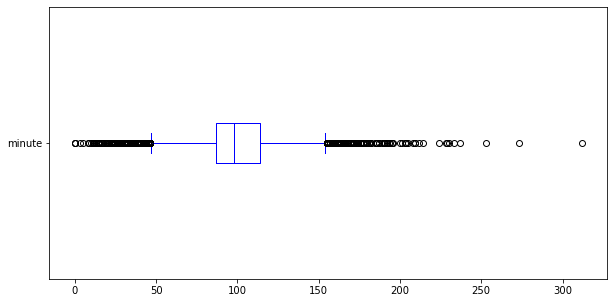

In [84]:
# Boxplot con pandas
df_movie['minute'].plot(kind='box',
                        vert=False,
                        color='blue',
                       figsize=(10,5))

In [242]:
# formulas para revisar valores estadíticos
# para obtener Q1 y Q3 utilizamos metedo describe
df_movie['minute'].describe()

count    4053.000000
mean      101.479398
std        30.009983
min         3.000000
25%        88.000000
50%       100.000000
75%       118.000000
max       273.000000
Name: minute, dtype: float64

In [193]:

# IQR = Q3-Q1

# Q1 - 1.5*IQR
min_boxplot = 87 - 1.5*(114-87)
# Q3 + 1.5*IQR
max_boxplot = 114 + 1.5*(114-87)
# Valor max y min
print(min_boxplot)
print(max_boxplot)

46.5
154.5


In [ ]:
# por tanto todo los valores <46.5min serán outliers
# y los valores >154.5min serán outliers

In [194]:
# tratamiento de outliers
df_movie[~((df_movie['minute']>46.5) & (df_movie['minute']<154.5))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute,inplace
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...,161,True
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166,True
45,s46,Movie,My Heroes Were Cowboys,Tyler Greco,NaN,NaN,"September 16, 2021",2021,PG,23 min,Documentaries,Robin Wiltshire's painful childhood was rescue...,23,True
71,s72,Movie,A StoryBots Space Adventure,David A. Vargas,"Evan Spiridellis, Erin Fitzgerald, Jeff Gill, ...",NaN,"September 14, 2021",2021,TV-Y,13 min,Children & Family Movies,Join the StoryBots and the space travelers of ...,13,True
73,s74,Movie,King of Boys,Kemi Adetiba,"Sola Sobowale, Adesua Etomi, Remilekun ""Remini...",Nigeria,"September 14, 2021",2018,TV-MA,182 min,"Dramas, International Movies",When a powerful businesswoman’s political ambi...,182,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45,True
8764,s8765,Movie,Wyatt Earp,Lawrence Kasdan,"Kevin Costner, Dennis Quaid, Gene Hackman, Dav...",United States,"January 1, 2020",1994,PG-13,191 min,Action & Adventure,Legendary lawman Wyatt Earp is continually at ...,191,True
8770,s8771,Movie,Yaadein,Subhash Ghai,"Jackie Shroff, Hrithik Roshan, Kareena Kapoor,...",India,"March 1, 2018",2001,TV-14,171 min,"Dramas, International Movies, Romantic Movies",Two young lovers set out to overcome the obsta...,171,True
8788,s8789,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",2015,TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",157,True


## Barchart to identify outliers CATEGORIC data

In [195]:
df_movie['rating']

0       PG-13
6          PG
7       TV-MA
9       PG-13
12      TV-MA
        ...  
8801    TV-MA
8802        R
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 6131, dtype: object

In [196]:
# como la información categorica no puede ser cuantificada, realizamos conteo para poder tratar cuantitativamente los datos
df_movie['rating'].value_counts()

TV-MA       2064
TV-14       1427
R            797
TV-PG        540
PG-13        490
PG           287
TV-Y7        139
TV-Y         131
TV-G         126
NR            75
G             41
TV-Y7-FV       5
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: rating, dtype: int64

<AxesSubplot:>

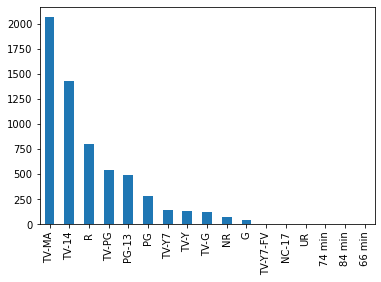

In [197]:
# evaluamos la distribución de frecuencia de los distintos rating
df_movie['rating'].value_counts().plot(kind='bar')

In [235]:
# Para filtrar outliers, teniendo en cuenta que la variable es categorica
# Definimos la columna rating como index para poder eliminar variables (lineas) consideradas outliers
df_movie.set_index('rating', inplace=True)

In [236]:
df_movie = df_movie.drop(['TV-MA', 'TV-Y7-FV', 'NC-17', 'UR', '74 min', '74 min', '84 min', '66 min'])


In [237]:
# Si queremos observar histograma de frecuencias despues del drop, 
    # reestablecemos el index por defecto y devolvemos rating a columnas para poder ser representado sus conteo
df_movie.reset_index(level=None, drop=False, inplace=True, col_level=0, col_fill='')


<AxesSubplot:>

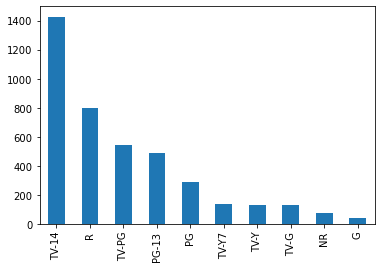

In [238]:
# Observamos Barchart sin los datos outliers
df_movie['rating'].value_counts().plot(kind='bar')

<AxesSubplot:>

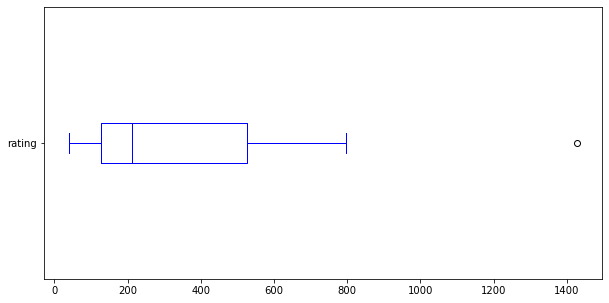

In [240]:
# Para mas información visualizamos boxplot, pero aquó acepta exclusivamente datos numericos,
    # por lo que representamos el conteo rating
df_movie['rating'].value_counts().plot(kind='box',
                        vert=False,
                        color='blue',
                       figsize=(10,5))

# de los datos escogidos, podemos ver que una de sus variables podría ser considera aun outlier

In [241]:
# para detectar ese posible outlier, hacemos recuento de la variables
df_movie['rating'].value_counts()

TV-14    1427
R         797
TV-PG     540
PG-13     490
PG        287
TV-Y7     139
TV-Y      131
TV-G      126
NR         75
G          41
Name: rating, dtype: int64

# NORMALIZE TEXT lower() upper() tittle()

## Manage inconsistency in uppercase and lowercase


In [299]:
# cambiar mayuscula/minuscula con el atributo str
df_movie['title'].str.lower()
df_movie['title'].str.upper()
df_movie['title'].str.title()


0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

In [300]:
# actualizar valores
df_movie['title'] = df_movie['title'].str.upper()
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute,inplace
0,s1,Movie,DICK JOHNSON IS DEAD,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,True
6,s7,Movie,MY LITTLE PONY: A NEW GENERATION,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,True
7,s8,Movie,SANKOFA,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,True
9,s10,Movie,THE STARLING,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,True
12,s13,Movie,JE SUIS KARL,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,ZINZANA,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96,True
8802,s8803,Movie,ZODIAC,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,True
8804,s8805,Movie,ZOMBIELAND,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,True
8805,s8806,Movie,ZOOM,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,True


In [302]:
# cambiar mayuscula/minuscula con el metodo apply
df_movie['title'] = df_movie['title'].apply(lambda x:x.title())
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute,inplace
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,True
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...,91,True
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125,True
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104,True
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96,True
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158,True
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88,True
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88,True


# Cleaning Blanks strip() lstrip() rstrip()

In [306]:
# funciamiento del metodo strip()
movie_title = ' Titanic     '
movie_title

' Titanic     '

In [307]:
# eliminar espacios delanteros con ltrip()
movie_title.lstrip()

'Titanic     '

In [308]:
# eliminar espacios finales con rtrip()
movie_title.rstrip()

' Titanic'

In [309]:
# elimnar espacios delanteros y finales con strip()
movie_title.strip()

'Titanic'

In [313]:
# eliminar espacios delanteros y finales con el metodo strip()
df_movie['title'] = df_movie['title'].str.strip()
df_movie['title']

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

In [314]:
# eliminar espacios delanteros y finales con el metodo apply()
df_movie['title'].apply(lambda x:x.strip())

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

# Remplacing String replace() o sub()

In [315]:
# eliminar signos de puntuacion con el metodo str.replace() y regex
# la expresion regex que selecciona signos de puntuacion a partir de la negacion
    # de seleccion de todos los demas caracteres es: [^\w\s]
df_movie['title']

0                   Dick Johnson Is Dead
6       My Little Pony: A New Generation
7                                Sankofa
9                           The Starling
12                          Je Suis Karl
                      ...               
8801                             Zinzana
8802                              Zodiac
8804                          Zombieland
8805                                Zoom
8806                              Zubaan
Name: title, Length: 6131, dtype: object

In [316]:
# en la siguiente funcion, reemplazaremos los signos de puntuación del texto en la columna title
    # el argumento regex=true indica que el primer parametro es una expresion regular
# si quisieramos sustituir una palabra concreta el regex=False
    # df_movie['title'].str.replace('PALABRA', '', regex=false)
    
df_movie['title'].str.replace('[^\w\s]', '', regex=True)

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object

In [317]:
# eliminar puntuacion con el metodo replace() y regex
df_movie['title'].replace('[^\w\s]', '', regex=True)

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object

In [ ]:
# diferencia entre str.replace() y replace()
 str.replace solo reemplaza cadena texto
 .replace reemplaza cadena de texto y numeros

In [318]:
# eliminar puntuacion con la funcion re.sub() con el metodo apply
# esta funcion pertenece a la libreria de expresiones regulares re
import re
# r.sub('lo que va a reemplazar'. 'cadena de texto que se reemplaza', el texto a evaluar )

In [320]:
df_movie['title'].apply(lambda x:re.sub('[^\w\s]', '', x))

0                  Dick Johnson Is Dead
6       My Little Pony A New Generation
7                               Sankofa
9                          The Starling
12                         Je Suis Karl
                     ...               
8801                            Zinzana
8802                             Zodiac
8804                         Zombieland
8805                               Zoom
8806                             Zubaan
Name: title, Length: 6131, dtype: object